In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [22]:
df = pd.read_csv('Problem2.csv')

In [23]:
print(df.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [24]:
import seaborn as sns

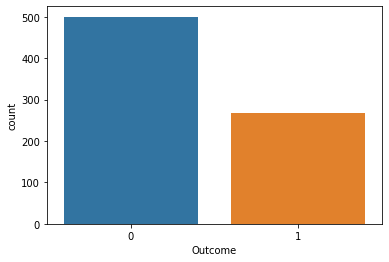

In [25]:
sns.countplot(df['Outcome'],label="Count")

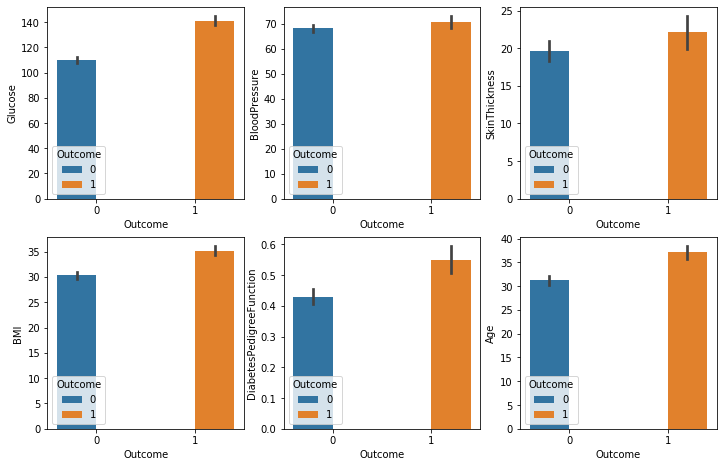

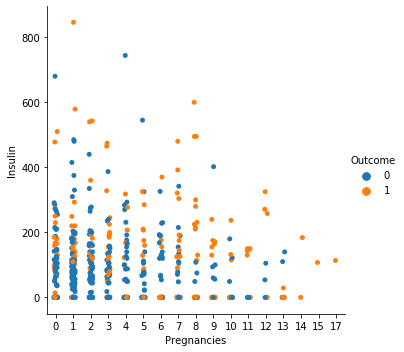

In [26]:
plt.figure(figsize=(12,12))
plt.subplot(3,3,1)
sns.barplot(x='Outcome',y='Glucose',data=df,hue="Outcome")
plt.subplot(3,3,2)
sns.barplot(x='Outcome',y='BloodPressure',data=df,hue="Outcome")
plt.subplot(3,3,3)
sns.barplot(x='Outcome',y='SkinThickness',data=df,hue="Outcome")
plt.subplot(3,3,4)
sns.barplot(x='Outcome',y='BMI',data=df,hue="Outcome")
plt.subplot(3,3,5)
sns.barplot(x='Outcome',y='DiabetesPedigreeFunction',data=df,hue="Outcome")
plt.subplot(3,3,6)
sns.barplot(x='Outcome',y='Age',data=df,hue="Outcome")
sns.catplot(x='Pregnancies',y='Insulin',data=df,hue='Outcome')

In [27]:
from sklearn.neighbors import KNeighborsClassifier

In [28]:
X_train, X_test, y_train, y_test = train_test_split(df.loc[:, df.columns != 'Outcome'], df['Outcome'], stratify=df['Outcome'], random_state=0,test_size=.2)

In [29]:
training_accuracy = []
test_accuracy = []
neighbors_settings = range(1,11)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

In [30]:
for n_neighbors in neighbors_settings:
    knc = KNeighborsClassifier(n_neighbors=n_neighbors)
    knc.fit(X_train, y_train)
    training_accuracy.append(knc.score(X_train, y_train))
    test_accuracy.append(knc.score(X_test, y_test))

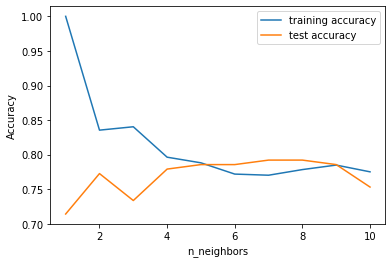

In [31]:
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.show()

In [32]:
knc = KNeighborsClassifier(n_neighbors=5)
knc.fit(X_train, y_train)
print('Accuracy of K-N classifier on training set: {:.2f}'.format(knc.score(X_train, y_train)))
print('Accuracy of K-N classifier on test set: {:.2f}'.format(knc.score(X_test, y_test)))

Accuracy of K-N classifier on training set: 0.79
Accuracy of K-N classifier on test set: 0.79


### K Neighbour Algorithm achieved highest accuracy of 0.79 on test set

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(df.loc[:, df.columns != 'Outcome'], df['Outcome'], stratify=df['Outcome'], random_state=0,test_size=.2)
X_train_scale1 = scaler.fit_transform(X_train)
X_test_scale1 = scaler.transform(X_test)

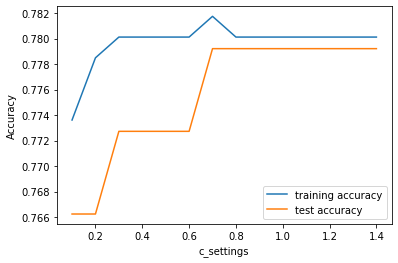

In [34]:
training_accuracy = []
test_accuracy = []
c_settings = np.arange(0.1,1.5,0.1)
for i in c_settings:
    logreg = LogisticRegression(C=i).fit(X_train_scale1, y_train)
    training_accuracy.append(logreg.score(X_train_scale1, y_train))
    test_accuracy.append(logreg.score(X_test_scale1, y_test))

plt.plot(c_settings, training_accuracy, label="training accuracy")
plt.plot(c_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("c_settings")
plt.legend()
plt.show()

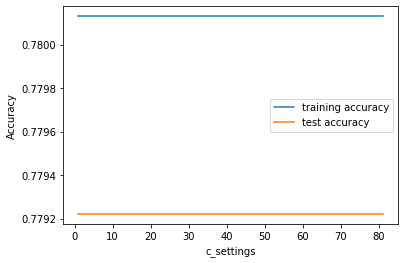

In [35]:
training_accuracy = []
test_accuracy = []
c_settings = np.arange(1,100,20)
for i in c_settings:
    logreg = LogisticRegression(C=i).fit(X_train_scale1, y_train)
    training_accuracy.append(logreg.score(X_train_scale1, y_train))
    test_accuracy.append(logreg.score(X_test_scale1, y_test))

plt.plot(c_settings, training_accuracy, label="training accuracy")
plt.plot(c_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("c_settings")
plt.legend()
plt.show()

In [36]:
logreg = LogisticRegression(C=0.7).fit(X_train_scale1, y_train)
print("Accuracy of Logistic Regression Classifier on Training Set: {:.2f}".format(logreg.score(X_train_scale1, y_train)))
print("Accuracy of Logistic Regression Classifier on Test Set:  {:.2f}".format(logreg.score(X_test_scale1, y_test)))

Accuracy of Logistic Regression Classifier on Training Set: 0.78
Accuracy of Logistic Regression Classifier on Test Set:  0.78


### Logistic Regression achieved highest accuracy of 0.78 on test set

# K Neighbour Algorithm is slightly better than Logistic Regression